In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv
/kaggle/input/californiapng/California.png


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                        
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression           #build model
from sklearn.model_selection import train_test_split        #data splitting
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

In [3]:
df = pd.read_csv('../input/california-housing-prices/housing.csv') 

In [4]:
# Shows the number of rows and columns in the data
df.shape

(20640, 10)

In [5]:
# take a look at the first five rows of the data set.
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
## See Data Columns 
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
# see sample of the data
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
503,-122.28,37.85,52.0,610.0,145.0,281.0,132.0,2.9018,119400.0,NEAR BAY
12168,-117.09,33.71,13.0,1974.0,426.0,1276.0,408.0,1.9720,90500.0,INLAND
3993,-118.57,34.18,36.0,2981.0,441.0,1243.0,413.0,6.5304,439800.0,<1H OCEAN
3264,-123.07,39.12,24.0,1098.0,193.0,353.0,145.0,3.8333,92600.0,<1H OCEAN
16595,-121.32,37.67,21.0,1494.0,271.0,781.0,255.0,4.3015,250000.0,INLAND
11906,-117.39,33.97,48.0,1915.0,348.0,1060.0,376.0,3.4044,117900.0,INLAND
19183,-122.59,38.44,14.0,1665.0,390.0,505.0,348.0,3.1830,201200.0,<1H OCEAN
1565,-121.93,37.78,2.0,227.0,35.0,114.0,49.0,3.1591,434700.0,<1H OCEAN
889,-121.95,37.55,21.0,10687.0,1540.0,4552.0,1520.0,6.6478,333400.0,<1H OCEAN
14093,-117.11,32.76,19.0,2188.0,616.0,1304.0,607.0,2.0852,114400.0,NEAR OCEAN


In [8]:
# see full info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# see the total null values
df.isnull().sum().sum()

207

In [10]:
# see the total null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
# get the median for the null bedrooms
bedroom_median = df['total_bedrooms'].median()
bedroom_median

435.0

In [13]:
# fill the null values with bedroom_median
df['total_bedrooms'].fillna(bedroom_median, inplace=True) 

In [14]:
# check for duplicates 
df.duplicated().sum()

0

### Dealing with the Outliers
#### Defining a function called `plot_outliers` to show the outliers in my plots.
#### Defining a function called `plot_hist` to visualize, and we will use it in visualizing the outliers.

In [15]:
def plot_outliers(df,col):
    plt.title(col)
    ax = sns.boxplot(data=df, x=col)
    ax.set(xlabel='')
    plt.show()

def plot_hist(df,col):
    plt.hist(x=df[col],bins=40,color='#D11239')
    plt.show();

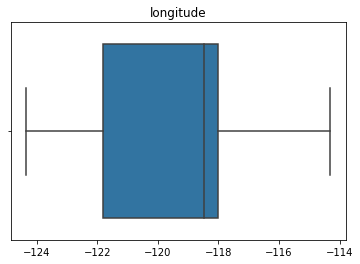

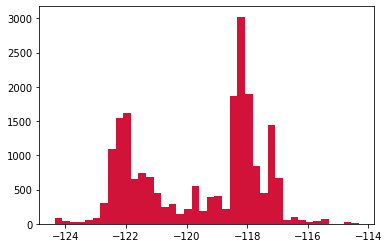

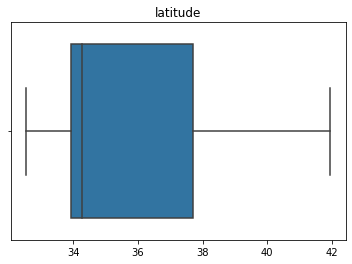

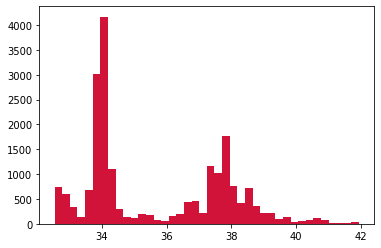

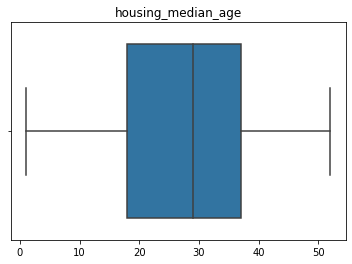

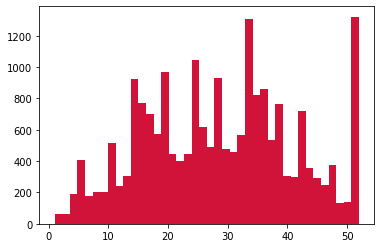

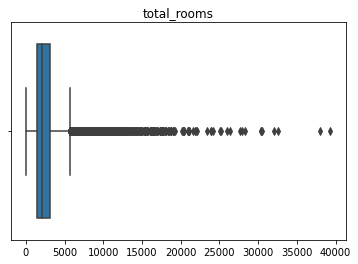

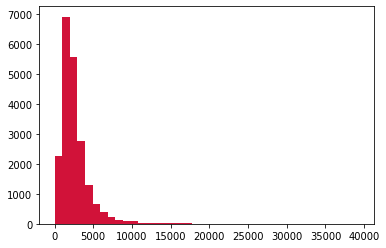

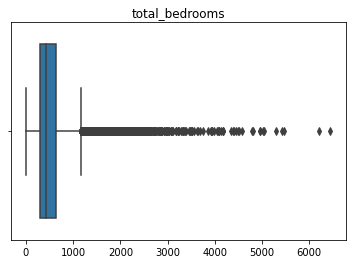

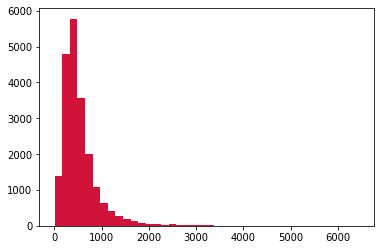

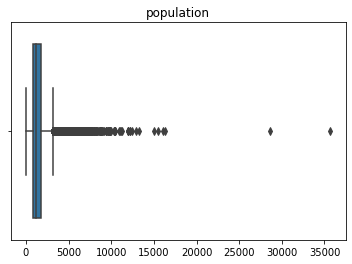

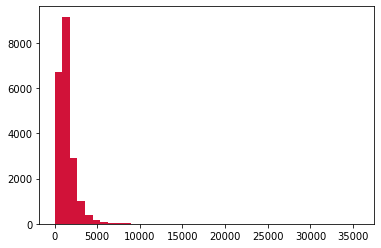

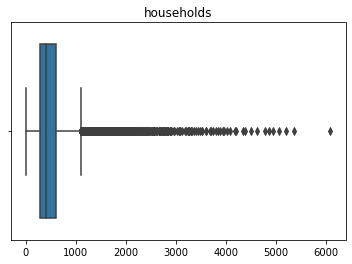

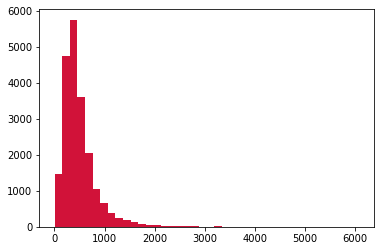

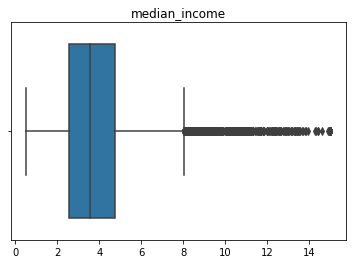

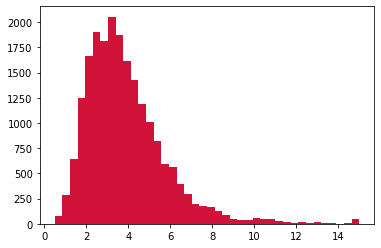

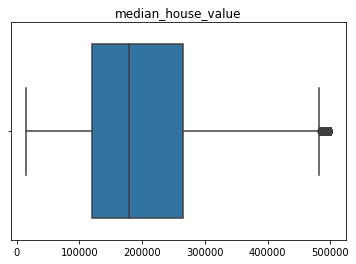

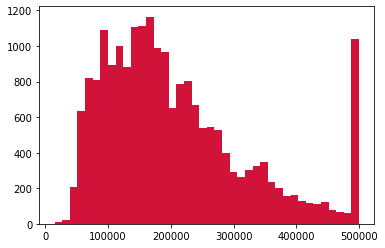

In [16]:
# loop over all the columns and draw outliers 
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_outliers(df,col)
        plot_hist(df,col)

In [17]:
## element the outliers in the rooms
firstQ = df['total_bedrooms'].quantile(0.25)
thirdQ = df['total_bedrooms'].quantile(0.75)
IQR = thirdQ - firstQ
IQR

346.25

In [18]:
newB = thirdQ + 3*(IQR)
df.drop(df[df['total_bedrooms']>newB].index, axis = 0, inplace =True)

In [19]:
# element outliers in population 
firstQ_p = df['population'].quantile(0.25)
thirdQ_p = df['population'].quantile(0.75)
IQR_p = thirdQ_p - firstQ_p
IQR_p

898.0

In [20]:
newB_p = thirdQ_p + 3*(IQR_p)
df.drop(df[df['population']>newB_p].index, axis = 0, inplace =True)
df.shape

(20025, 10)

In [21]:
# element the outliers in household
firstQ_h = df['households'].quantile(0.25)
thirdQ_h = df['households'].quantile(0.75)
IQR_h = thirdQ_h - firstQ_h
IQR_h

305.0

In [22]:
newB_h = thirdQ_h + 3*(IQR_h)
df.drop(df[df['households']>newB_h].index, axis = 0, inplace =True)
df.shape

(19986, 10)

In [23]:
# element the outliers in total_rooms
firstQ_t = df['total_rooms'].quantile(0.25)
thirdQ_t = df['total_rooms'].quantile(0.75)
IQR_t = thirdQ_t - firstQ_t
IQR_t

1586.0

In [24]:
newB_t = thirdQ_t + 3*(IQR_t)
df.drop(df[df['total_rooms']>newB_t].index, axis = 0, inplace =True)
df.shape

(19855, 10)

In [25]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000
mean,-119.591407,35.650936,29.153312,2342.482397,480.643264,1279.459280,449.132511,3.849380,206120.444271
std,2.003036,2.141464,12.422856,1343.135693,272.202236,727.702493,252.001974,1.895958,115652.421223
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.940000,19.000000,1425.000000,292.000000,774.000000,275.000000,2.551000,118500.000000
50%,-118.510000,34.270000,29.000000,2073.000000,426.000000,1139.000000,399.000000,3.517900,178600.000000
75%,-118.020000,37.720000,37.000000,2991.000000,612.000000,1643.000000,575.000000,4.714300,263900.000000
max,-114.310000,41.950000,52.000000,7754.000000,1646.000000,4367.000000,1496.000000,15.000100,500001.000000


In [26]:
# show the correlation between columns 
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924605,-0.098044,0.003978,0.041384,0.106120,0.032183,-0.016650,-0.045491
latitude,-0.924605,1.000000,0.000629,-0.006527,-0.050530,-0.127223,-0.062754,-0.079678,-0.145278
housing_median_age,-0.098044,0.000629,1.000000,-0.333454,-0.269588,-0.246823,-0.247483,-0.107382,0.114106
total_rooms,0.003978,-0.006527,-0.333454,1.000000,0.884602,0.786026,0.883381,0.227568,0.174922
total_bedrooms,0.041384,-0.050530,-0.269588,0.884602,1.000000,0.831967,0.967096,-0.063024,0.050382
population,0.106120,-0.127223,-0.246823,0.786026,0.831967,1.000000,0.875628,-0.048221,-0.055903
households,0.032183,-0.062754,-0.247483,0.883381,0.967096,0.875628,1.000000,-0.032113,0.070484
median_income,-0.016650,-0.079678,-0.107382,0.227568,-0.063024,-0.048221,-0.032113,1.000000,0.687141
median_house_value,-0.045491,-0.145278,0.114106,0.174922,0.050382,-0.055903,0.070484,0.687141,1.000000


In [27]:
df.corr()['median_house_value'].sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.687141
total_rooms           0.174922
housing_median_age    0.114106
households            0.070484
total_bedrooms        0.050382
longitude            -0.045491
population           -0.055903
latitude             -0.145278
Name: median_house_value, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

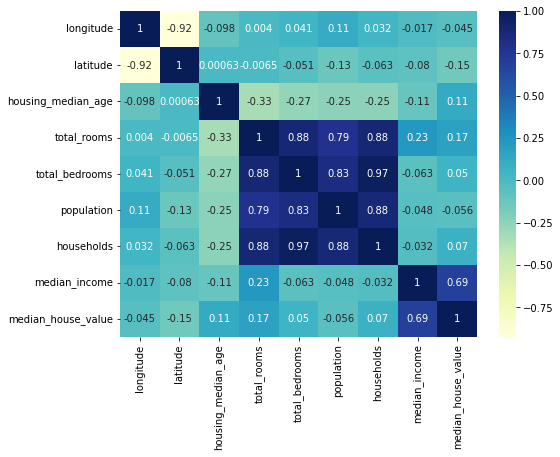

In [28]:
#visualize the correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show

In [29]:
# create a function to show the values in the plot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

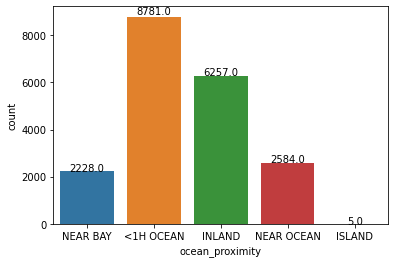

In [30]:
x1=sns.countplot(x=df['ocean_proximity'], data=df)
show_values(x1)

#### Using `.imread` in the map plot to insert an image

In [31]:
# there is an issue in this i will fix it 
# df.plot(kind = "scatter", x="longitude" , y="latitude" , c =df["median_house_value"], s =df["population"]/100,
#         alpha = 0.4, cmap = plt.get_cmap("jet"),label = 'population', figsize = (12,8))


# #load png image
# map_image = mpimg.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/California_blank_map.svg/1631px-California_blank_map.svg.png")

# plt.imshow(map_image, extent = [-124.55, -114, 32.55, 42.05], alpha = 0.4, cmap = plt.get_cmap("jet"))

# plt.xlabel("longitude")
# plt.ylabel("latitude")

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

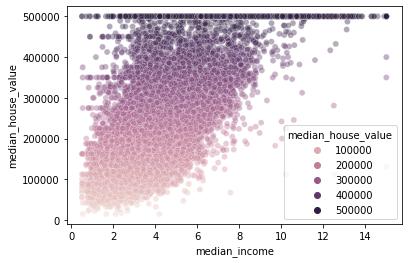

In [32]:
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], hue=df['median_house_value'],alpha=0.4)

-----
## Linear Regression 

#### Using `.get_dummies` to change the object value to (0,1) values


In [33]:
df = pd.get_dummies(df, prefix=None)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [34]:
# define x , y
X = df.drop(columns=["median_house_value","longitude", "latitude","ocean_proximity_ISLAND" ]).astype(float)
y = df.loc[:,'median_house_value'].astype(float)

In [35]:
X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,1.0,0.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,1.0,0.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0


In [36]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 19855, dtype: float64

In [37]:
#sns.pairplot(df, x_vars=['housing_median_age','total_rooms','total_bedrooms'
#                        ,'population','households','median_income','ocean_proximity_INLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','ocean_proximity_less 1H OCEAN'], y_vars='median_house_value',diag_kind='kde')

## Split dataset [ train - vaidation - test ]

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=0)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [40]:
### Actual train,test and val
y_actual_train=y_train
y_actual_test=y_test
y_actual_val=y_val

----------
## Scale

In [41]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

## Linear Regression 

In [42]:
my_model = LinearRegression()
my_model.fit(X_train , y_train)

LinearRegression()

In [43]:
print(f'The Linear regression coefficients are: {my_model.coef_}')
print(f'The Linear regression interception is: {my_model.intercept_}')

The Linear regression coefficients are: [ 1.21227474e+03 -1.00832055e+01  9.82418060e+01 -6.36821083e+01
  1.52616367e+02  4.06043815e+04 -1.42986906e+05 -2.11476066e+05
 -1.43743286e+05 -1.34693076e+05]
The Linear regression interception is: 167578.4330458486


In [44]:
# Predict Value
y_predict = my_model.predict(X_test)
y_predict

array([155039.87562217,  97873.05428141,  53086.3043467 , ...,
       176750.8900518 , 301071.60289913, 145011.69126697])

In [45]:
#real Value
y_test

14818    125000.0
19938    104200.0
2726      56100.0
8179     231600.0
16985    305800.0
           ...   
14595    188000.0
12143    122100.0
20146    186000.0
9345     355000.0
1056      89900.0
Name: median_house_value, Length: 3971, dtype: float64

In [46]:
# Regression Score
train_data_score = my_model.score(X_train , y_train)
test_data_score = my_model.score(X_test , y_test)
val_data_score = my_model.score(X_val , y_val)

print(f'The Linear regression train R^2 is: {train_data_score}')
print(f'The Linear regression val R^2 is: {val_data_score}')
print(f'The Linear regression test R^2 is: {test_data_score}')

The Linear regression train R^2 is: 0.6445400897575642
The Linear regression val R^2 is: 0.654372602273364
The Linear regression test R^2 is: 0.654372602273364


In [47]:
y_pred_lr = my_model.predict(X_test)
r2_score(y_test, y_pred_lr)

0.654372602273364

In [48]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_pred_lr)).mean() 
RMSE = math.sqrt(MSE)
print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 4602636013.815906
Root Mean Square Error: 67842.72999972735


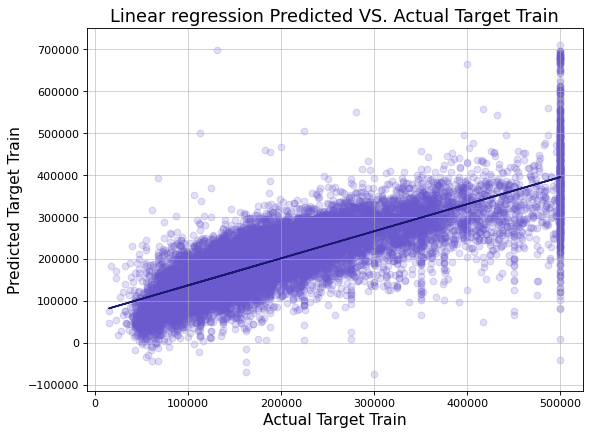

In [49]:
y_train_pred_linear = my_model.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_linear, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_linear, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Linear regression Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

### Decision tree regressor model

In [50]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=4)
DT_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [51]:
# Predict Value
y_predict_dt = DT_model.predict(X_test)
y_predict_dt

array([149068.54454023,  79418.35066865,  79418.35066865, ...,
       223356.75861261, 299840.22939068,  79418.35066865])

In [52]:
#real Value
y_test

14818    125000.0
19938    104200.0
2726      56100.0
8179     231600.0
16985    305800.0
           ...   
14595    188000.0
12143    122100.0
20146    186000.0
9345     355000.0
1056      89900.0
Name: median_house_value, Length: 3971, dtype: float64

In [53]:
## Score
train_data_score_dt = DT_model.score(X_train , y_train)
test_data_score_dt = DT_model.score(X_test , y_test)
val_data_score_dt = DT_model.score(X_val , y_val)

print(f'The Decision tree regressor train R^2 is: {train_data_score_dt}')
print(f'The Decision tree regressor val R^2 is: {val_data_score_dt}')
print(f'The Decision tree regressor test R^2 is: {test_data_score_dt}')

The Decision tree regressor train R^2 is: 0.6044531965639962
The Decision tree regressor val R^2 is: 0.6060372660649458
The Decision tree regressor test R^2 is: 0.6060372660649458


----
### Lasso 

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import mean
from numpy import std
from numpy import absolute

In [55]:
lasso_model = Lasso(alpha=1.0)

In [56]:
lasso_model.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.526e+13, tolerance: 2.127e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

In [57]:
# Predict Value
y_predict_lasso = lasso_model.predict(X_test)
y_predict_lasso

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([-8.93039361e+05, -5.05599828e+07, -3.09406403e+07, ...,
       -1.22151537e+08, -5.69284394e+07, -1.06107418e+08])

In [58]:
## Score
train_data_score_ls = lasso_model.score(X_train_scaled , y_train)
test_data_score_ls = lasso_model.score(X_test_scaled , y_test)
val_data_score_ls = lasso_model.score(X_val_scaled , y_test)

print(f'The Ridge regression train R^2 is: {train_data_score_ls}')
print(f'The Ridge regression val R^2 is: {val_data_score_ls}')
print(f'The Ridge regression test R^2 is: {test_data_score_ls}')

The Ridge regression train R^2 is: 0.6444119223566356
The Ridge regression val R^2 is: 0.6538349849800387
The Ridge regression test R^2 is: 0.6538349849800387


In [59]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_predict_lasso)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 4818390618054753.0
Root Mean Square Error: 69414628.27138638


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


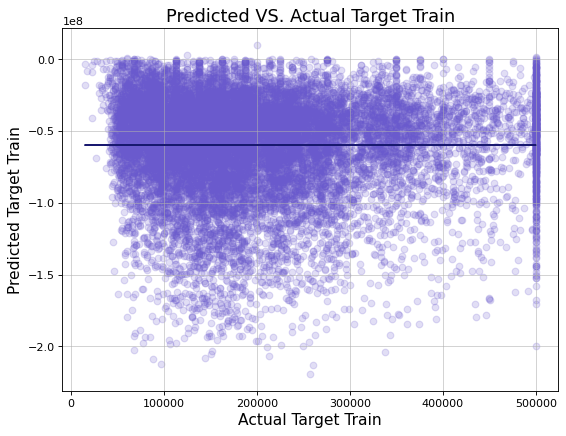

In [60]:
y_train_pred_lasso = lasso_model.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_lasso, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_lasso, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

----
## Ridge 

In [61]:
rl = Ridge(alpha=1)
rl.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [62]:
#Score
rl_train = rl.score(X_train_scaled, y_train)
rl_test = rl.score(X_test_scaled, y_test)
rl_val=rl.score(X_val_scaled, y_val)

print(f'The Ridge regression train R^2 is: {rl_train}')
print(f'The Ridge regression val R^2 is: {rl_val}')
print(f'The Ridge regression test R^2 is: {rl_test}')

The Ridge regression train R^2 is: 0.644529534722677
The Ridge regression val R^2 is: 0.6542488672968234
The Ridge regression test R^2 is: 0.6542488672968234


In [63]:
# Predict Value
y_predict_ri = rl.predict(X_test)
y_predict_ri

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([-9.12023013e+05, -5.05781938e+07, -3.09562527e+07, ...,
       -1.22141305e+08, -5.69388383e+07, -1.06108587e+08])

In [64]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_predict_ri)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 4819148117415709.0
Root Mean Square Error: 69420084.39504889


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


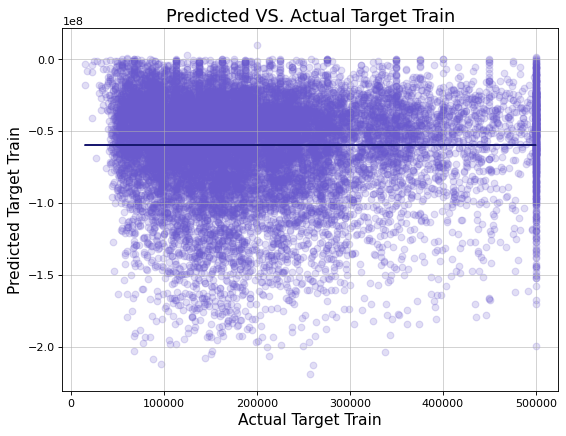

In [65]:
y_train_pred_rl = rl.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_rl, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_rl, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

---
## Random Forest Regressor Model

In [66]:
forest=RandomForestRegressor(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5)

In [67]:
y_pr_f=forest.predict(X_test)
y_pr_f

array([157520. ,  93240. ,  53520. , ..., 183740. , 309200.2, 106080. ])

In [68]:
#real Value
y_test

14818    125000.0
19938    104200.0
2726      56100.0
8179     231600.0
16985    305800.0
           ...   
14595    188000.0
12143    122100.0
20146    186000.0
9345     355000.0
1056      89900.0
Name: median_house_value, Length: 3971, dtype: float64

In [69]:
train_data_score_forest = forest.score(X_train , y_train)
test_data_score_forest = forest.score(X_test , y_test)
test_data_score_forest = forest.score(X_val , y_val)

print(f'The Random Forest Regressor train R^2 is: {train_data_score_forest}')
print(f'The Random Forest Regressor test R^2 is: {test_data_score_forest}')
print(f'The Random Forest Regressor R^2 is: {test_data_score_forest}')

The Random Forest Regressor train R^2 is: 0.9274560788397823
The Random Forest Regressor test R^2 is: 0.6679117778187813
The Random Forest Regressor R^2 is: 0.6679117778187813


In [70]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_pr_f)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 4422338105.222444
Root Mean Square Error: 66500.66244198206


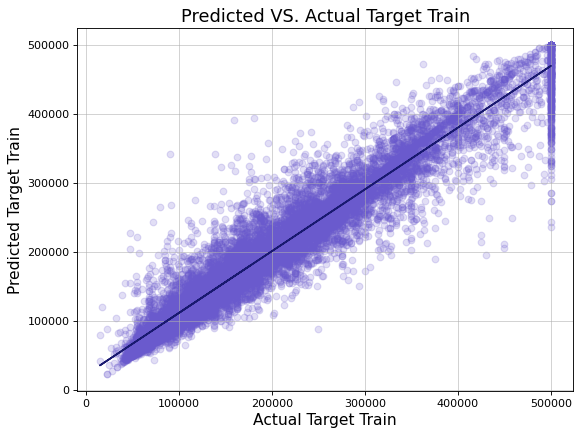

In [71]:
y_train_pred_forest = forest.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_forest, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_forest, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

-------
## Polynomial Model

In [72]:
poly = PolynomialFeatures(degree=3) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_model = LinearRegression()

In [73]:
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [74]:
X_poly = poly.fit_transform(X_test)
regressor = LinearRegression()
regressor.fit(X_poly,y_test)
y_poly_pred=regressor.predict(X_poly)

In [75]:
#Score
poly_val=poly_model.score(X_val_poly, y_val)
poly_test=poly_model.score(X_test_poly, y_test)
poly_train=poly_model.score(X_train_poly, y_train)

print(f'The polynomial regression train R^2 is: {poly_train}')
print(f'polynomial regression test R^2 is: {poly_test}')
print(f'polynomial regression val R^2 is: {poly_val}')

The polynomial regression train R^2 is: 0.735098282208609
polynomial regression test R^2 is: 0.7217152711349867
polynomial regression val R^2 is: 0.7217152711349867


In [76]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_poly_pred)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 3264588140.2269487
Root Mean Square Error: 57136.5744530327


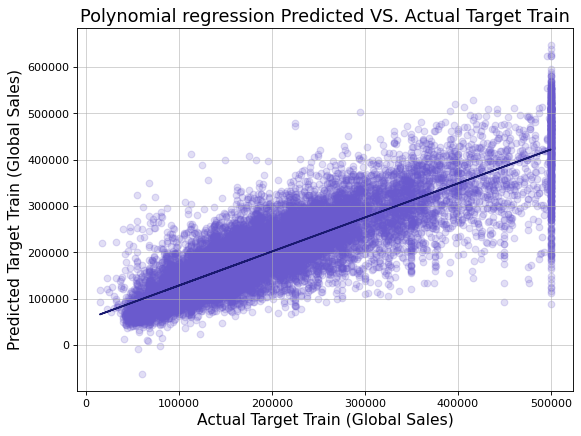

In [77]:
y_train_pred_poly = poly_model.predict(X_train_poly)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_poly, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_poly, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train (Global Sales)', fontsize=14)
plt.ylabel('Predicted Target Train (Global Sales)', fontsize=14)
plt.title('Polynomial regression Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)